# Project 1: SAT & ACT Analysis


## Problem Statement

Study and analyse trends in the data to find out what is affecting participation rates for ACT and SAT tests and how can this be improved.

## Executive Summary

In the USA, students are familiar with the ACT test and the SAT test. In this case, we will be using ACT and SAT data from 2017-2018, to understand and comment on participation rates and the different average scores for each test. We will explore changes and carry out external research to better understand what the data cannot explain. At the end, conclusions and recommendations will be made on how we can better improve on future participation rates of ACT and SAT tests. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv') 

In [3]:
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


In [7]:
sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


Answer: 

In [8]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### American College Testing (ACT) 2017
 - 52 counts within the DataFrame
 - data consist of the participation rate(obj) the examination and all state ACT scores of 'English(float)', 'Math(float)', 'Reading(float)', 'Science(float)' and a 'Composite(obj)' of these four categories, comprising of every state(obj) in USA for the year 2017. 

##### Scholastic Aptitude Test(SAT) 2017
- 51 counts within the DataFrame
- data consist of participation rate(obj) from variables such as 'Evidence-Based Reading and Writing(int)', 'Math(int)' and the 'Total(int)' of both variables of every state(obj) in the USA.



#### 4a. Does the data look complete? 

Answer: 

In terms of fields within each cell, the data looks complete with 51 non-null values. However, that is limited to whether the data have errors within them. To find out more, we will have to clean the data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: By comparing the provided data with the data source, there are a few obvious issues with the observation. 

##### SAT
- `Sum` Error: The 'Total' variable is a total sum of 'Math' and 'ERW' that has minor discrepancies.
- Typo: When comparing the SAT data, the state of Maryland has a different value in it's 'Math' variable from that of the data source.
- Data omission: The 'National Average' variable available in the SAT 2017 source data is missing from the sat_2017.

##### ACT
- `Sum` Error: The 'Composite' variable acts as the average score of 'English, 'Math', 'Reading' and 'Science'. However, some data points have minor discrepancies.
- Typo: In the state of Maryland, the 'Science' variable is different from that of the data source.
- Typo: In the state of Wyoming, the 'Composite' variable contains '20.2x', which is inconsistent of that from the data source.

In [10]:
sat_2017.describe(include='all')
#minimum and maximum values for all variables can be found in the table below

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,Rhode Island,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


In [11]:
sat_2017[sat_2017['Math'] == 52]
#minimum value in SAT 2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
act_2017.describe(include='all')
#minimum and maximum values for all variables can be found in the table below

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52
unique,52,28,NaN,NaN,NaN,NaN,38
top,Rhode Island,100%,NaN,NaN,NaN,NaN,20.3
freq,1,17,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,20.919231,21.173077,22.001923,21.040385,NaN
std,NaN,NaN,2.332132,1.963602,2.048672,3.151113,NaN
min,NaN,NaN,16.300000,18.000000,18.100000,2.300000,NaN
25%,NaN,NaN,19.000000,19.400000,20.475000,19.900000,NaN
50%,NaN,NaN,20.550000,20.900000,21.700000,21.150000,NaN
75%,NaN,NaN,23.300000,23.100000,24.125000,22.525000,NaN


In [13]:
act_2017[act_2017['Science'] == 2.3]
#minimum value in ACT 2017

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
#Change values for the state of Maryland (both SAT and ACT) and Wyoming (ACT)

sat_2017.iat[20,3]=524 #replace 'Maryland' (Math variable) in 'sat_2017' from 52 to 524
act_2017.iat[21,5]=23.2 #replace 'Maryland' (Science variable) in act_2017 from 2.3 to 23.2
act_2017.iat[51,6]=20.2 #replace 'Wyoming' (Composite variable) in act_2017 from '20.2x' to 20.2

In [15]:
act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
sat_2017.dtypes #data types of sat_2017

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
act_2017.dtypes #data types of act_2017

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

##### sat_2017
- 'Participation' is reflected as an object. We should convert this into a float to be able to use the participation rate for statistic questions below.

##### act_2017
- 'Composite' should be a float instead of an object.
- 'Participation' is reflected as an object. We should convert this into a float to be able to use the participation rate for statistic questions below.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
# function to convert participation rates to numeric type

def convert_to_numeric(x):
    x1 = pd.to_numeric(x, errors='coerce')
    return x1

- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
#converting act_2017['Composite'] to a float data type and bringing it back into dataframe

act_2017['Composite'] = act_2017['Composite'].astype(float) 

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
# function is being called to sat_2017
# applying lamba x:x[:-1] to remove '%'

x = convert_to_numeric(sat_2017['Participation'].apply(lambda x:x[:-1])) 

#sat_2017's new participation percentages (new_sat_2017) are expressed in decimal

new_sat_2017 = x / 100 

In [21]:
y = convert_to_numeric(act_2017['Participation'].apply(lambda x:x[:-1])) 
new_act_2017 = y / 100

In [22]:
#Putting percentage decimal back to dataframe

sat_2017['Participation'] = new_sat_2017
act_2017['Participation'] = new_act_2017

- Display the data types again to confirm they are correct.

In [23]:
#Code:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [24]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
#make column names lowercase and replace spaces with underscores

sat_2017.columns = ['state','sat_17_participation','sat_17_erw','sat_17_math','sat_17_total']
sat_2017.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total'],
      dtype='object')

In [26]:
#same for act_2017

act_2017.columns = ['state', 'act_17_participation', 'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science', 'act_17_composite']
act_2017.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
| :---: | :---: | :---: |:---:|
|state|object|ACT/SAT|Name of states across USA|
|act_17_participation|float|ACT (act_2017)|Percentage of participation rate for 2017 ACT test|
|act_17_english|float|ACT (act_2017)|ACT 2017 English average score|
|act_17_math|float|ACT (act_2017)|ACT 2017 Math average score|
|act_17_reading|float|ACT (act_2017)|ACT 2017 Reading average score|
|act_17_science|float|ACT (act_2017)|ACT 2017 Science average scoree|
|act_17_composite|float|ACT (act_2017)|ACT 2017 Composite score|
|sat_17_participation|float|SAT (sat_2017)|Percentage of participation rate for 2017 SAT test|
|sat_17_erw|int|SAT (sat_2017)|SAT 2017 Evidence-Based Reading and Writing average score|
|sat_17_math|int|SAT (sat_2017)|SAT 2017 Math average score|
|sat_17_total|int|SAT (sat_2017)|SAT 2017 Total score|
|act_18_participation|float|ACT (act_2018)|percentage of participation rate for 2018 ACT test|
|act_18_english|float|ACT (act_2018)|ACT 2018 English average score|
|act_18_math|float|ACT (act_2018)|ACT 2018 Math average score|
|act_18_reading|float|ACT (act_2018)|ACT 2018 Reading average score|
|act_18_science|float|ACT (act_2018)|ACT 2018 Science average score|
|act_18_composite|float|ACT (act_2018)|ACT 2018 Composite score|
|sat_18_participation|float|SAT (sat_2018)|Percentage of participation rate for 2018 SAT test|
|sat_18_erw|int|SAT (sat_2018)|SAT 2018 Evidence-Based Reading and Writing average score|
|sat_18_math|int|SAT (sat_2018)|SAT 2018 Math average score|
|sat_18_total|int|SAT (sat_2018)|SAT 2018 Total score|
|sat_participation_change|float|SAT (final)|2017-2018 SAT participation rate change|
|act_participation_change|float|ACT (final)|2017-2018 ACT participation rate change|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#code

#act_2017 has an extra row,'National'. To remove this, we will make use of the drop() function
act_2017.drop(0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
#Merge act_2017 and sat_2017 to get combined_2017

combined_2017 = pd.merge(act_2017, sat_2017, on='state', how='outer') 
combined_2017.head() 

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#Using relative path to save combined_2017

combined_2017.to_csv('../data/combined_2017.csv')

In [30]:
combined_2017.shape

(51, 11)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
#import act_2018 and sat_2018

sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

# Problems

## sat_2018
- similar to sat_2017, we will apply our previous function to remove the '%' in participation, express it as a decimal and convert it into a numerical data type (float).
- we will rename the column names to end with 's_18' for clear distinction between SAT/ACT data and the year associated.

## act_2018
- we will convert participation into a decimal, and convert it into a float data type to be consistent with other data frames
- composite will be shifted to the last column, to be consistent with act_2017
- we will rename the column names to end with 'a_18' for clear distinction between SAT/ACT data and the year associated.
- remove any data that is not relevant to our data frame

In [32]:
w = convert_to_numeric(sat_2018['Participation'].apply(lambda x:x[:-1])) 

#call function to convert participation to numeric while removing '%'

new_sat_2018 = w/100 

#expressing sat_2018's percentage as a decimal

In [33]:
sat_2018['Participation'] = new_sat_2018 

#applying new values into sat_2018 data frame

sat_2018.columns = ['state','sat_18_participation','sat_18_erw','sat_18_math','sat_18_total'] 

#renaming column names to include 'sat_18_'

sat_2018.head()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [34]:
act_2018['Participation'] = act_2018['Participation'] / 100 

#converting participation into a percentage expressed as a decimal

act_2018.head()

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [35]:
act_2018_columns = ['State', 'Participation', 'English', 'Math', 'Reading', 'Science', 'Composite']
act_2018 = act_2018.reindex(columns=act_2018_columns) 

#reindexing the columns on act_2018 to move composite to the last column

act_2018.columns = ['state', 'act_18_participation', 'act_18_english', 'act_18_math', 'act_18_reading', 'act_18_science', 'act_18_composite']

#renaming each column name and adding 'act_18_'

In [36]:
act_2018

,state,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7
5,Colorado,0.30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,0.26,26.0,24.8,26.1,24.9,25.6
7,Delaware,0.17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,0.32,23.7,22.7,24.4,23.0,23.6
9,Florida,0.66,19.2,19.3,21.1,19.5,19.9


In [37]:
#removed index 51 ('National') from act_2018

act_2018.drop(51, inplace=True) 
act_2018.head()

,state,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [38]:
act_2018.shape

(51, 7)

In [39]:
#Merging act_2018 and sat_2018 to get combined_2018

combined_2018 = pd.merge(act_2018, sat_2018, on='state', how='outer')
combined_2018.head()

,state,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [40]:
combined_2018.shape

(51, 11)

In [41]:
#saving combined_2018 to relative path

combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [42]:
#merging combined_2017 and combine_2018 to get final

final = pd.merge(combined_2017, combined_2018, how='outer', on='state') 
final.to_csv('../data/final.csv')

In [43]:
final.head(10)

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_erw,sat_17_math,...,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,0.30,23.9,23.2,24.4,23.5,23.9,1.00,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,0.26,26.0,24.8,26.1,24.9,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,0.32,23.7,22.7,24.4,23.0,23.6,0.92,497,480,977
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,0.66,19.2,19.3,21.1,19.5,19.9,0.97,522,493,1014


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_17_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_17_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
#standard deviation function
def stdv(c):
    sd = 0
    mean = c.mean() # mean of each column
    for i in range(len(c)): # loop every value in each column and apply (xi - mean)^2
        sd += (c[i] - mean) **2
    sd = sd * (1/len(c)) # multiply by 1/n
    sd = sd **0.5 # squareroot is equivalent to ^1/2
    return sd

In [46]:
stdv(final.sat_17_erw) 
#ensuring function works

45.21697020437866

In [47]:
final.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite',
       'sat_17_participation', 'sat_17_erw', 'sat_17_math', 'sat_17_total',
       'act_18_participation', 'act_18_english', 'act_18_math',
       'act_18_reading', 'act_18_science', 'act_18_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total'],
      dtype='object')

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
final_cols = ['act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite',
       'sat_17_participation', 'sat_17_erw', 'sat_17_math', 'sat_17_total',
       'act_18_participation', 'act_18_english', 'act_18_math',
       'act_18_reading', 'act_18_science', 'act_18_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total']

In [49]:
sd = {i:stdv(final[i]) for i in final_cols} 

# sd is a dictionary comprehension for computing the standard deviation of every column in final, 
# using our function stdv for each column name in 'final_cols'

sd

{'act_17_participation': 0.3182417575123181,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_composite': 2.000786081581989,
 'sat_17_participation': 0.3492907076664507,
 'sat_17_erw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_18_participation': 0.33745194881997503,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.145891884510421,
 'act_18_science': 1.8516885484833543,
 'act_18_composite': 2.0855261815801147,
 'sat_18_participation': 0.3763965409204987,
 'sat_18_erw': 44.87118561762388,
 'sat_18_math': 48.40589946919447,
 'sat_18_total': 92.94224786343668}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [50]:
final.describe().T # pandas describe function to get standard deviation

,count,mean,std,min,25%,50%,75%,max
act_17_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_17_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


In [51]:
np.std(final, axis=0) #using numpy's std function to get standard deviation

act_17_participation     0.318242
act_17_english           2.330488
act_17_math              1.962462
act_17_reading           2.046903
act_17_science           1.722216
act_17_composite         2.000786
sat_17_participation     0.349291
sat_17_erw              45.216970
sat_17_math             46.657134
sat_17_total            91.583511
act_18_participation     0.337452
act_18_english           2.422254
act_18_math              2.015707
act_18_reading           2.145892
act_18_science           1.851689
act_18_composite         2.085526
sat_18_participation     0.376397
sat_18_erw              44.871186
sat_18_math             48.405899
sat_18_total            92.942248
dtype: float64

Answer: 

The values in our output is similar to numpy's `std` values, apart from the decimals points. However, output values differs from pandas `describe` values. The difference between the values may be due to a more specific computing formula that pandas use to compute standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [52]:
# 2017 SAT highest participation rate

s17_hpr = final.loc[:, ['state','sat_17_participation']]
s17_hpr.sort_values(by='sat_17_participation', ascending=False).head()

,state,sat_17_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [53]:
# 2017 SAT lowest participation rate

s17_lpr = final.loc[:, ['state','sat_17_participation']]
s17_lpr.sort_values(by='sat_17_participation', ascending=True).head()

,state,sat_17_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [54]:
# 2018 SAT highest participation rate

s18_hpr = final.loc[:, ['state','sat_18_participation']]
s18_hpr.sort_values(by='sat_18_participation', ascending=False).head(6)

,state,sat_18_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99


In [55]:
# 2018 SAT lowest participation rate

s18_lpr = final.loc[:, ['state','sat_18_participation']]
s18_lpr.sort_values(by='sat_18_participation', ascending=True).head()

,state,sat_18_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [56]:
# 2017 ACT highest participation rate

a17_hpr = final.loc[:, ['state','act_17_participation']]
a17_hpr.sort_values(by='act_17_participation', ascending=False).head(18)

,state,act_17_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [57]:
# 2017 ACT lowest participation rate

a17_lpr = final.loc[:, ['state','act_17_participation']]
a17_lpr.sort_values(by='act_17_participation', ascending=True).head()

,state,act_17_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [58]:
# 2018 ACT highest participation rate

a18_hpr = final.loc[:, ['state','act_18_participation']]
a18_hpr.sort_values(by='act_18_participation', ascending=False).head(18)

,state,act_18_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [59]:
# 2018 ACT lowest participation rate

a18_lpr = final.loc[:, ['state','act_18_participation']]
a18_lpr.sort_values(by='act_18_participation', ascending=True).head()

,state,act_18_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [60]:
#Which states have the highest and lowest mean total/composite scores for the:
#2017 SAT?
#2018 SAT?
#2017 ACT?
#2018 ACT?

In [61]:
# 2017 SAT highest total mean

s17_htm = final.loc[:, ['state','sat_17_total']]
s17_htm.sort_values(by='sat_17_total', ascending=False).head()

,state,sat_17_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [62]:
# 2017 SAT lowest total mean

s17_ltm = final.loc[:, ['state','sat_17_total']]
s17_ltm.sort_values(by='sat_17_total', ascending=True).head()

,state,sat_17_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [63]:
# 2018 SAT highest total mean

s18_htm = final.loc[:, ['state','sat_18_total']]
s18_htm.sort_values(by='sat_18_total', ascending=False).head()

,state,sat_18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1264


In [64]:
# 2018 SAT lowest total mean

s18_ltm = final.loc[:, ['state','sat_18_total']]
s18_ltm.sort_values(by='sat_18_total', ascending=True).head()

,state,sat_18_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011


In [65]:
# 2017 ACT highest mean composite

a17_hmc = final.loc[:, ['state','act_17_composite']]
a17_hmc.sort_values(by='act_17_composite', ascending=False).head()

,state,act_17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [66]:
# 2017 ACT lowest mean composite

a17_lmc = final.loc[:, ['state','act_17_composite']]
a17_lmc.sort_values(by='act_17_composite', ascending=True).head()

,state,act_17_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [67]:
# 2018 ACT highest mean composite

a18_hmc = final.loc[:, ['state','act_18_composite']]
a18_hmc.sort_values(by='act_18_composite', ascending=False).head()

,state,act_18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [68]:
# 2018 ACT lowest mean composite

a18_lmc = final.loc[:, ['state','act_18_composite']]
a18_lmc.sort_values(by='act_18_composite', ascending=True).head()

,state,act_18_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [69]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

#To compute change, we must take the difference between participation rates

final['sat_participation_change'] = final.sat_17_participation - final.sat_18_participation

#Change in ACT's participation rate

final['act_participation_change'] = final.act_17_participation - final.act_18_participation

In [70]:
#The District of Columbia has a rate change of 0.08 (8%) in SAT participation

In [71]:
final.loc[:, ['sat_18_participation','sat_17_participation', 'sat_participation_change']].sort_values(by=['sat_17_participation', 'sat_18_participation'], ascending=False).head()
# Comparing if SAT 100% participation rate states experience rate change year-to-year


,sat_18_participation,sat_17_participation,sat_participation_change
6,1.00,1.00,0.00
7,1.00,1.00,0.00
22,1.00,1.00,0.00
8,0.92,1.00,0.08
29,0.96,0.96,0.00


In [72]:
final.iloc[8,:]
#The District of Columbia has a rate change of 0.08 (8%) in SAT participation

state                       District of Columbia
act_17_participation                        0.32
act_17_english                              24.4
act_17_math                                 23.5
act_17_reading                              24.9
act_17_science                              23.5
act_17_composite                            24.2
sat_17_participation                           1
sat_17_erw                                   482
sat_17_math                                  468
sat_17_total                                 950
act_18_participation                        0.32
act_18_english                              23.7
act_18_math                                 22.7
act_18_reading                              24.4
act_18_science                                23
act_18_composite                            23.6
sat_18_participation                        0.92
sat_18_erw                                   497
sat_18_math                                  480
sat_18_total        

In [73]:
final.loc[:, ['act_18_participation','act_17_participation', 'act_participation_change']].sort_values(by=['act_17_participation', 'act_18_participation'], ascending=False).head(20)
# Comparing if ACT 100% participation rate states experience rate change year-to-year


,act_18_participation,act_17_participation,act_participation_change
0,1.00,1.00,0.00
3,1.00,1.00,0.00
17,1.00,1.00,0.00
18,1.00,1.00,0.00
24,1.00,1.00,0.00
25,1.00,1.00,0.00
26,1.00,1.00,0.00
28,1.00,1.00,0.00
33,1.00,1.00,0.00
36,1.00,1.00,0.00


In [74]:
final.iloc[23,:]
#The Minnesota has a rate change of 0.01 (1%) in ACT participation

state                       Minnesota
act_17_participation                1
act_17_english                   20.4
act_17_math                      21.5
act_17_reading                   21.8
act_17_science                   21.6
act_17_composite                 21.5
sat_17_participation             0.03
sat_17_erw                        644
sat_17_math                       651
sat_17_total                     1295
act_18_participation             0.99
act_18_english                   20.2
act_18_math                      21.4
act_18_reading                   21.7
act_18_science                   21.4
act_18_composite                 21.3
sat_18_participation             0.04
sat_18_erw                        643
sat_18_math                       655
sat_18_total                     1298
sat_participation_change        -0.01
act_participation_change         0.01
Name: 23, dtype: object

In [75]:
final.iloc[5,:]
#The Colorado has a rate change of 0.70 (70%) in ACT participation

state                       Colorado
act_17_participation               1
act_17_english                  20.1
act_17_math                     20.3
act_17_reading                  21.2
act_17_science                  20.9
act_17_composite                20.8
sat_17_participation            0.11
sat_17_erw                       606
sat_17_math                      595
sat_17_total                    1201
act_18_participation             0.3
act_18_english                  23.9
act_18_math                     23.2
act_18_reading                  24.4
act_18_science                  23.5
act_18_composite                23.9
sat_18_participation               1
sat_18_erw                       519
sat_18_math                      506
sat_18_total                    1025
sat_participation_change       -0.89
act_participation_change         0.7
Name: 5, dtype: object

In [76]:
#Do any states show have >50% participation on both tests either year

In [77]:
mask_2017 = (final['sat_17_participation'] > 0.5) & (final['act_17_participation'] > 0.5)
final[mask_2017]

#States that have > 50% participation on both tests in 2017

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_erw,sat_17_math,...,act_18_math,act_18_reading,act_18_science,act_18_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,sat_participation_change,act_participation_change
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.3,21.1,19.5,19.9,0.97,522,493,1014,-0.14,0.07
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,20.7,21.2,21.4,21.4,0.70,542,522,1064,-0.09,0.02
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,19.0,19.1,19.0,18.9,0.56,550,549,1099,-0.01,0.01


In [78]:
mask_2018 = (final['sat_18_participation'] > 0.5) & (final['act_18_participation'] > 0.5)
final[mask_2018]

#States that have > 50% participation on both tests in 2018

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_erw,sat_17_math,...,act_18_math,act_18_reading,act_18_science,act_18_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,sat_participation_change,act_participation_change
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,19.3,21.1,19.5,19.9,0.97,522,493,1014,-0.14,0.07
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,20.7,21.2,21.4,21.4,0.70,542,522,1064,-0.09,0.02
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,19.0,19.1,19.0,18.9,0.56,550,549,1099,-0.01,0.01
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,19.3,19.5,19.2,19.1,0.52,554,543,1098,-0.03,0.00
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,18.2,18.6,18.5,18.3,0.55,547,523,1070,-0.05,0.00


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

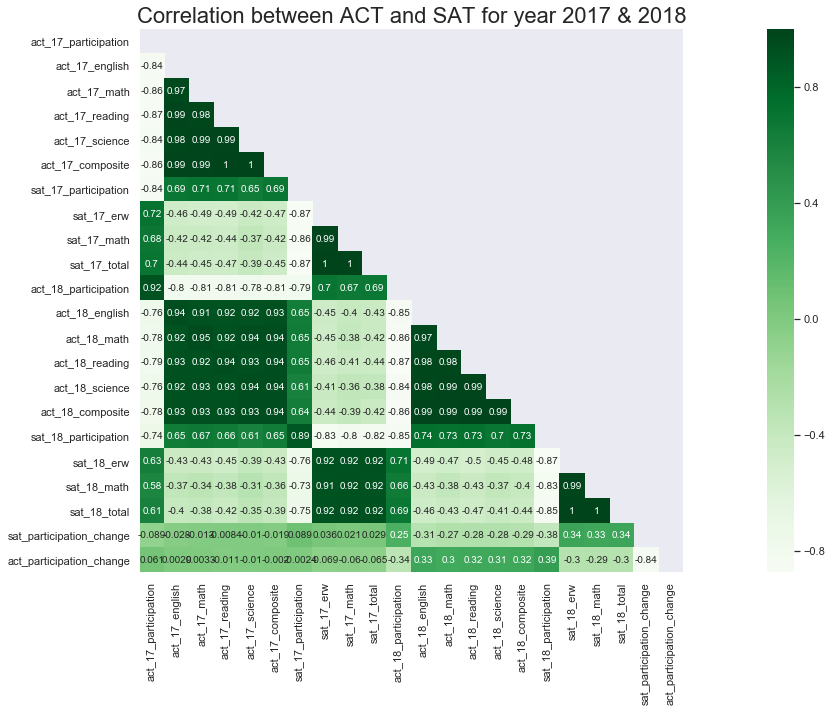

In [135]:
#Heatmap showing correlation between ACT and SAT for year 2017 and 2018
plt.figure(figsize=(30,10))
mask = np.zeros_like(final.corr())
#zeros_like returns an array of zero with the same shape and type of given array
mask[np.triu_indices_from(mask)] = True
#ensuring 'triu_indices_from' (returns true indices for upper triangle of array) is True
plt.title("Correlation between ACT and SAT for year 2017 & 2018", fontsize=22)
#title of heatmap
sns.heatmap(final.corr(), mask=mask, square=True,cmap="Greens", annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [138]:
#Function for histogram
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 10) 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot
        ax[i].set_ylabel(list_of_ylabels[i]) # Set ylabels for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

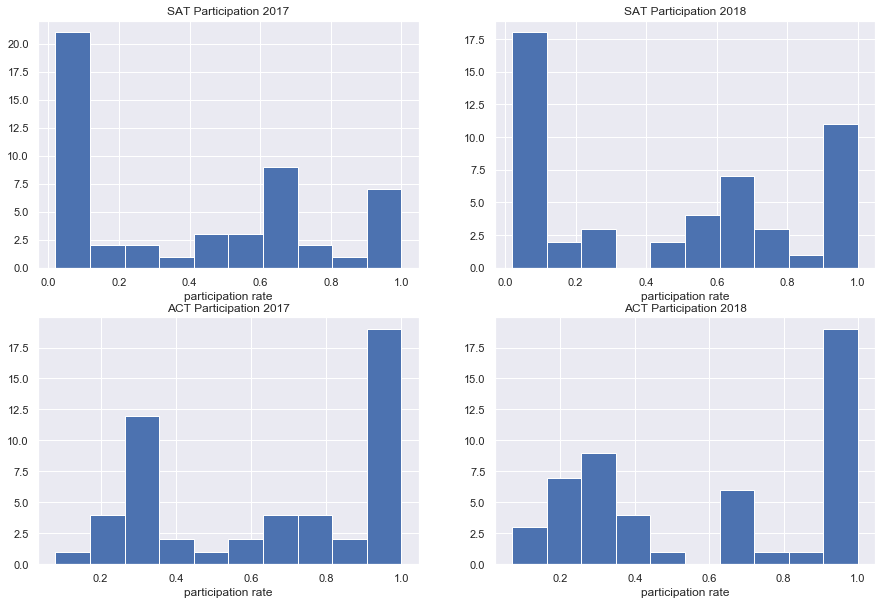

In [139]:
#Histogram of ACT and SAT Participation Rate for 2017 and 2018
list_of_columns = ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']
list_of_titles=['SAT Participation 2017', 'SAT Participation 2018', 'ACT Participation 2017', 'ACT Participation 2018']
list_of_xlabels=['participation rate', 'participation rate', 'participation rate', 'participation rate']
list_of_ylabels=['', '', '', ''] 

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)


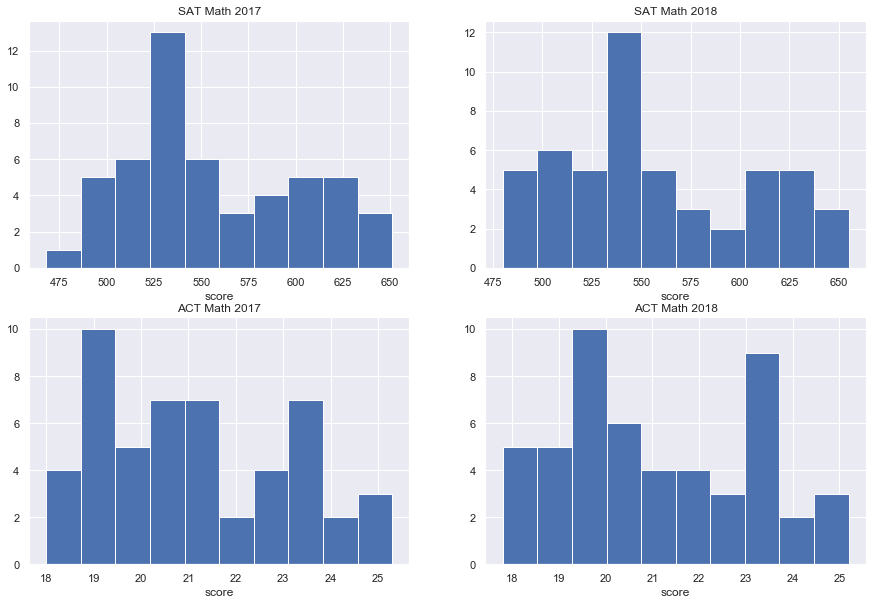

In [82]:
#Histogram of ACT and SAT Math scores for 2017 and 2018
list_of_columns = ['sat_17_math', 'sat_18_math', 'act_17_math', 'act_18_math']
list_of_titles=['SAT Math 2017', 'SAT Math 2018', 'ACT Math 2017', 'ACT Math 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

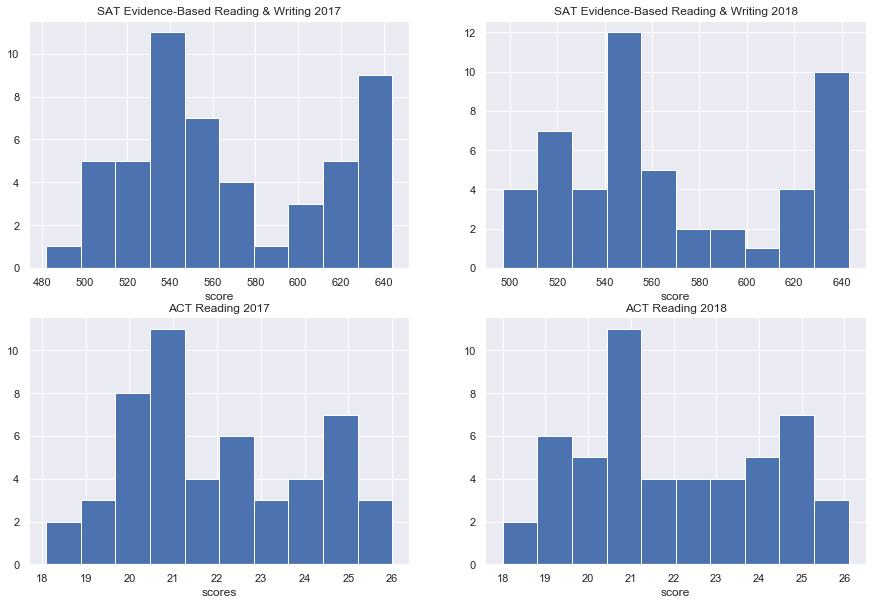

In [83]:
#Histogram of 2017 and 2018 Reading/Verbal scores for ACT and SAT

list_of_columns = ['sat_17_erw', 'sat_18_erw', 'act_17_reading', 'act_18_reading']
list_of_titles=['SAT Evidence-Based Reading & Writing 2017', 'SAT Evidence-Based Reading & Writing 2018', 'ACT Reading 2017', 'ACT Reading 2018']
list_of_xlabels=['score', 'score', 'scores', 'score']
list_of_ylabels=['', '', '', ''] 

subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

##### Interpretation
- Participation rates tend to share a bimodal distribution
- Students tend to do average in Math
- None of the graphs show a normal distribution

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT')

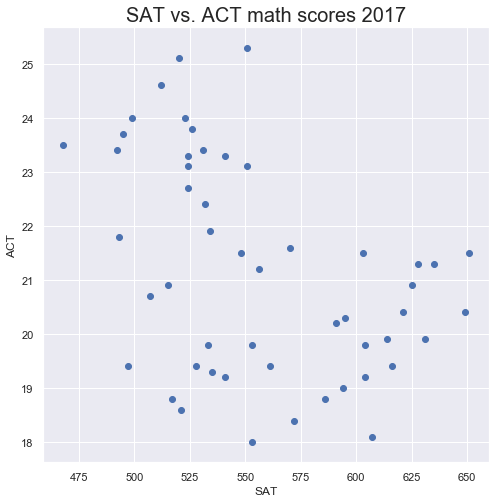

In [140]:
#Scatterplot for SAT versus ACT Math Score for 2017
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_17_math, final.act_17_math) 
ax.set_title('SAT vs. ACT math scores 2017', fontsize=20) 
ax.set_xlabel('SAT'); ax.set_ylabel('ACT')

Text(0, 0.5, 'ACT')

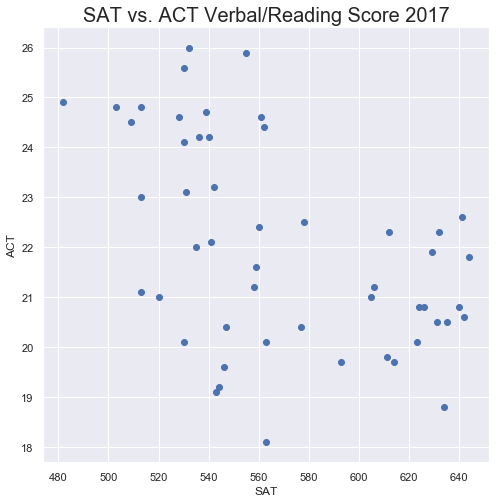

In [85]:
#Scatterplot for SAT Verbal versus ACT Reading Score for 2017
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_17_erw, final.act_17_reading)
ax.set_title('SAT vs. ACT Verbal/Reading Score 2017', fontsize=20)
ax.set_xlabel('SAT'); ax.set_ylabel('ACT')

Text(0, 0.5, 'ACT')

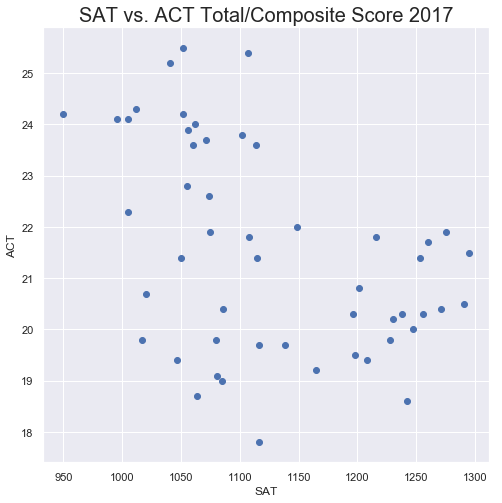

In [86]:
#Scatterplot for SAT Total versus ACT Composite Score for 2017
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_17_total, final.act_17_composite)
ax.set_title('SAT vs. ACT Total/Composite Score 2017', fontsize=20)
ax.set_xlabel('SAT'); ax.set_ylabel('ACT')

Text(0, 0.5, 'SAT_18')

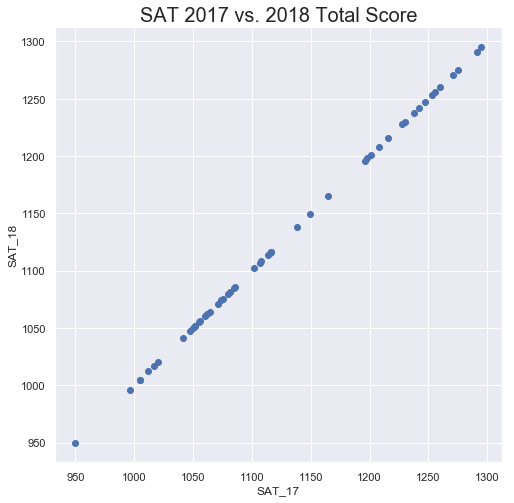

In [87]:
#Scatterplot for SAT 2017/2018 Total Score
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_17_total, final.sat_17_total)
ax.set_title('SAT 2017 vs. 2018 Total Score', fontsize=20)
ax.set_xlabel('SAT_17'); ax.set_ylabel('SAT_18')

Text(0, 0.5, 'ACT_18')

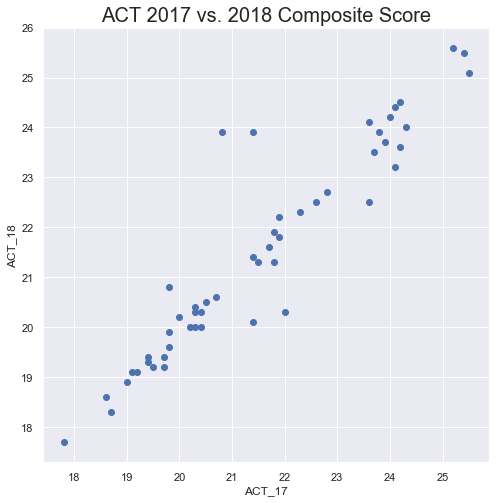

In [88]:
#Scatterplot for ACT 2017/2018 Composite Score
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.act_17_composite, final.act_18_composite)
ax.set_title('ACT 2017 vs. 2018 Composite Score', fontsize=20)
ax.set_xlabel('ACT_17'); ax.set_ylabel('ACT_18')

##### Interpretation

- SAT versus ACT Math Score for 2017
  - No one state excelled in both ACT and SAT Math score
  - States usually fare better in one test and weaker in another
- SAT Verbal versus ACT Reading Score for 2017
  - No one state excelled in both ACT Reading and SAT EBRW score
  - States usually fare better in one test and weaker in another
- SAT Total versus ACT Composite Score for 2017
  - No one state excelled in both ACT Composite and SAT Total score
  - States usually fare better in one test and weaker in another
- SAT 2017/2018 Total Score
  - SAT Total score share a linear line that is positive
  - The Increasing return to scale means:
    - students who fare well in SAT 2017 will fare well in SAT 2018
- ACT 2017/2018 Composite Score 
  - ACT Total score share a linear line that is positive with some outliers
  - The Increasing return to scale means:
    - students who fare well in ACT 2017 will fare well in ACT 2018

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

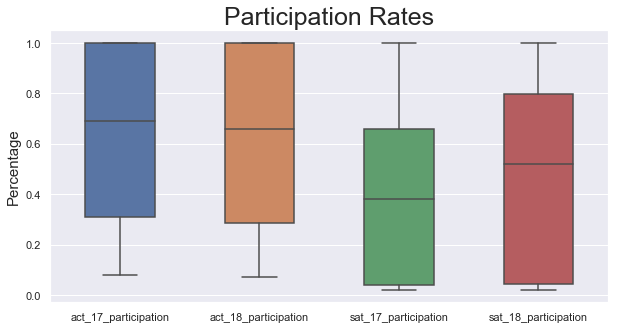

In [142]:
#Boxplots of participation rates
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Participation Rates', fontsize =25); plt.ylabel('Percentage', fontsize = 15)
sns.boxplot(data= final[['act_17_participation', 'act_18_participation',
                         'sat_17_participation', 'sat_18_participation']], width = 0.5)

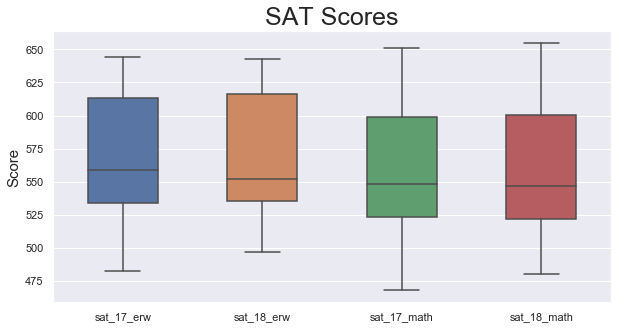

In [143]:
#Boxplots of SAT Evidence-Based Reading and Writing scores and Math scores for 2017 and 2018
fig, ax = plt.subplots(figsize=(10,5))
plt.title('SAT Scores', fontsize =25)
plt.ylabel('Score', fontsize = 15)
sns.boxplot(data= final[['sat_17_erw', 'sat_18_erw', 'sat_17_math', 'sat_18_math']], width = 0.5)

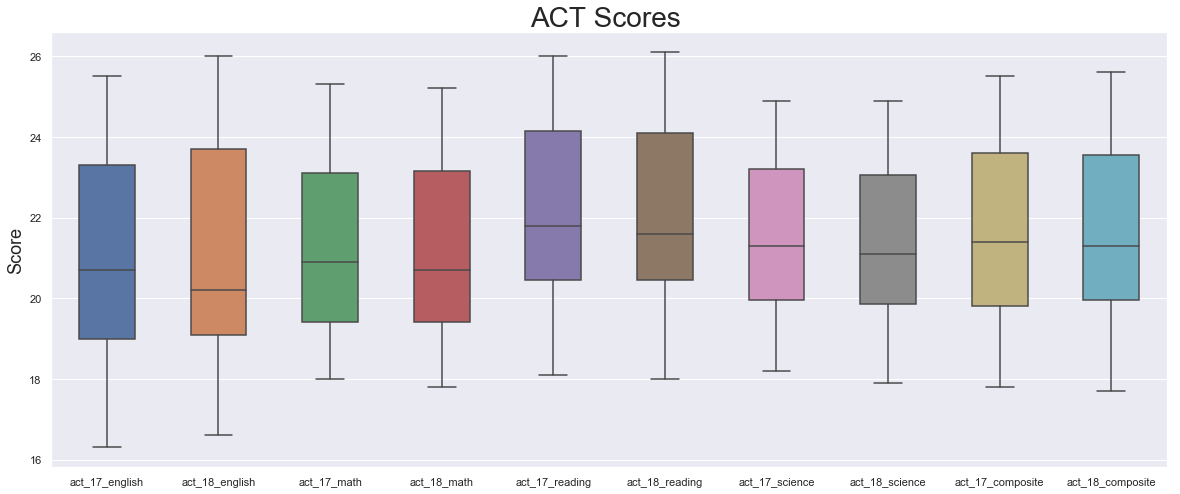

In [91]:
#Boxplots for ACT Scores for 2017 and 2018
fig, ax = plt.subplots(figsize=(20,8))
plt.title('ACT Scores ', fontsize =28)
plt.ylabel('Score', fontsize = 18)
sns.boxplot(data= final[['act_17_english', 'act_18_english', 'act_17_math', 'act_18_math',
       'act_17_reading', 'act_18_reading', 'act_17_science', 'act_18_science', 'act_17_composite'
                         , 'act_18_composite']], width = 0.5)

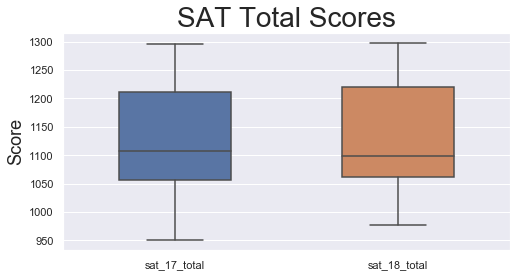

In [92]:
#Boxplots for Total SAT Scores for 2017 and 2018
fig, ax = plt.subplots(figsize=(8,4))
plt.title('SAT Total Scores', fontsize =28)
plt.ylabel('Score', fontsize = 18)
sns.boxplot(data= final[['sat_17_total', 'sat_18_total']], 
             width = 0.5)

#### Interpretation of Boxplots:

- The participation rates for ACT is higher than that of SAT. 
  - ACT has a higher Inter-Quartile Range (IQR)
    - higher max and min values
    - higher median
- There were more SAT participants in 2018
   - Higher IQR and median than 2017 data
- Students fared better in SAT 2017 as compared to SAT 2018
  - Higher median scores in sat_17_total vs sat_18_total
- Students usually fare better in linguistics subjects such as English, Reading, Writing as compared to science subjects like Math and Science.
- The ACT test for year 2017 and 2018 seem to share similar difficulty for students
   - Boxplots are similar; varies marginally


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

1. How does participation affect Composite/Total scores?

2. How does the distribution of Total/Composite scores look like?

3. How does the distribution of ACT English and Science scores look like?

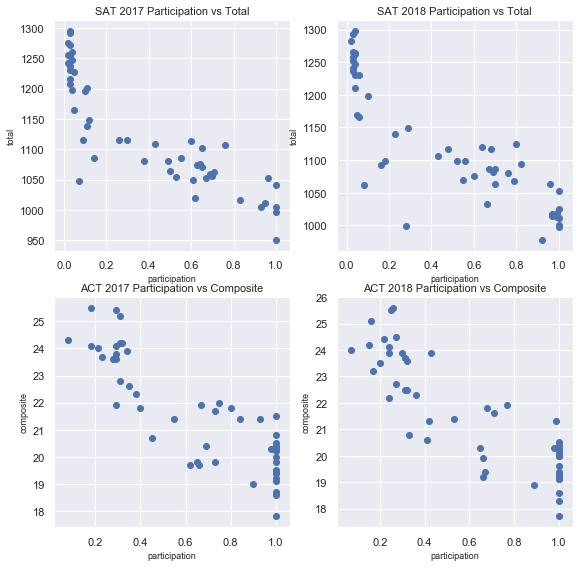

In [93]:
#Scatterplot between Participation and Composite/Total Scores for ACT/SAT 2017 and 2018
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].scatter(final.sat_17_participation, final.sat_17_total)
ax[0,0].set_title('SAT 2017 Participation vs Total', fontsize=11)
ax[0,0].set_xlabel('participation', fontsize=9)
ax[0,0].set_ylabel('total', fontsize=9)

ax[0,1].scatter(final.sat_18_participation, final.sat_18_total)
ax[0,1].set_title('SAT 2018 Participation vs Total', fontsize=11)
ax[0,1].set_xlabel('participation', fontsize=9)
ax[0,1].set_ylabel('total', fontsize=9)

ax[1,0].scatter(final.act_17_participation, final.act_17_composite)
ax[1,0].set_title('ACT 2017 Participation vs Composite', fontsize=11)
ax[1,0].set_xlabel('participation', fontsize=9)
ax[1,0].set_ylabel('composite', fontsize=9)

ax[1,1].scatter(final.act_18_participation, final.act_18_composite)
ax[1,1].set_title('ACT 2018 Participation vs Composite', fontsize=11)
ax[1,1].set_xlabel('participation', fontsize=9)
ax[1,1].set_ylabel('composite', fontsize=9)

plt.subplots_adjust(bottom=0, left=0)

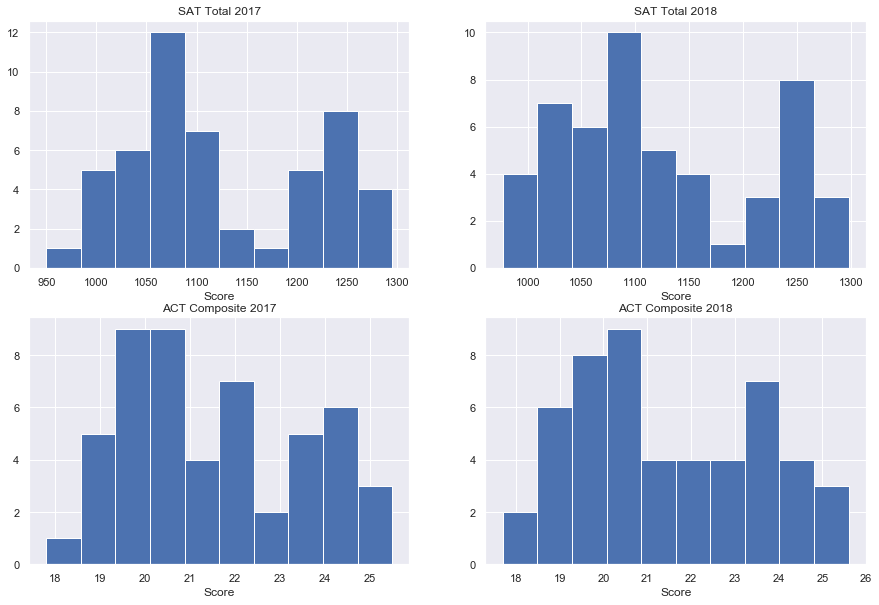

In [94]:
list_of_columns = ['sat_17_total', 'sat_18_total', 'act_17_composite', 'act_18_composite']
list_of_titles=['SAT Total 2017', 'SAT Total 2018', 'ACT Composite 2017', 'ACT Composite 2018']
list_of_xlabels=['Score', 'Score', 'Score', 'Score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

#Histogram of SAT Total and ACT Composite Scores for 2017 and 2018

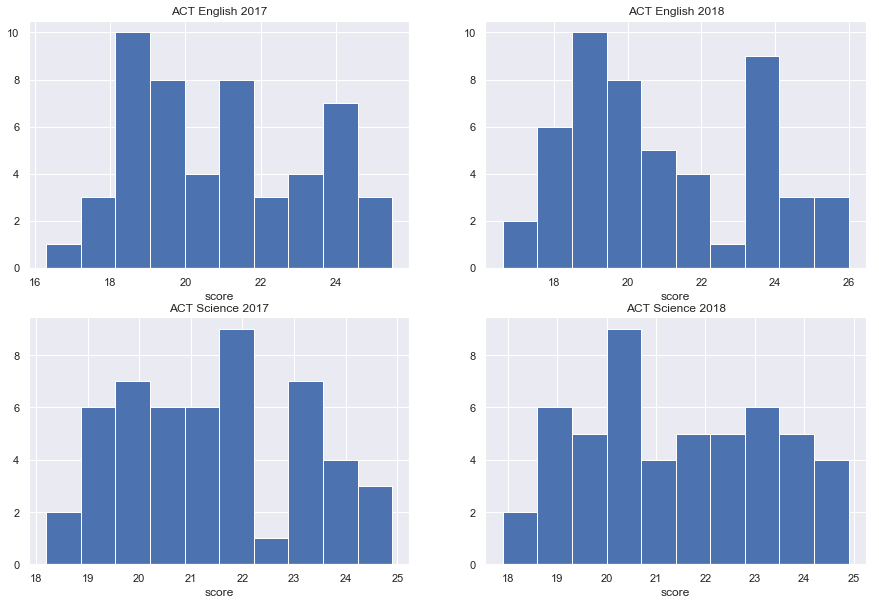

In [95]:
list_of_columns = ['act_17_english', 'act_18_english', 'act_17_science',  'act_18_science']
list_of_titles=['ACT English 2017', 'ACT English 2018', 'ACT Science 2017', 'ACT Science 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
#Histogram of ACT English and Science scores for 2017 and 2018

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [96]:
# not enough time to plot choropleth map

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [97]:
#skewness function to determine if skewness is left-skewed, right-skewed or otherwise

def skewness(column, std):
    a = column.mean()
    b = column.median()
    c = a - b
    if c > 0:
        print('Right skewed')
    elif c == 0:
        print('Comment: ')
    else:
        print('Left skewed')
    return print('Standard deviation:', np.std(column))


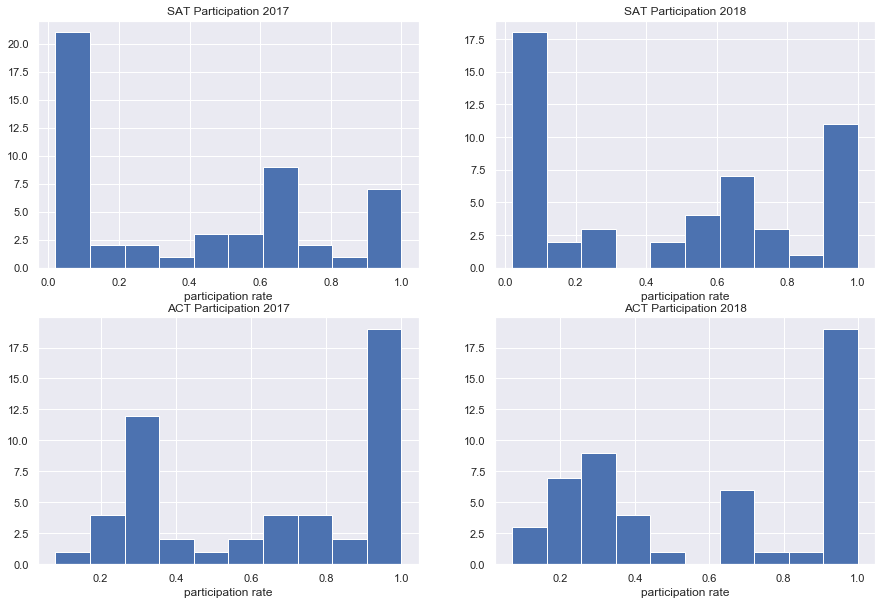

In [98]:
# histogram of each variable are shown in the following lines, recalling our previous 'subplot_histogram' function

list_of_columns = ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']
list_of_titles=['SAT Participation 2017', 'SAT Participation 2018', 'ACT Participation 2017', 'ACT Participation 2018']
list_of_xlabels=['participation rate', 'participation rate', 'participation rate', 'participation rate']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
#Histogram of SAT and ACT participation rates for 2017 and 2018

In [99]:
skewness(final.sat_17_participation, np.std(final.sat_17_participation)) 
#skewness for sat_17_participation

Right skewed
Standard deviation: 0.3492907076664507


In [100]:
skewness(final.sat_18_participation, np.std(final.sat_18_participation)) 
#skewness for sat_18_participation

Left skewed
Standard deviation: 0.3763965409204987


### act_17_participation Distribution is bimodal with two peaks

In [101]:
skewness(final.act_17_participation, np.std(final.act_17_participation)) 
#skewness for act_17_participation

Left skewed
Standard deviation: 0.3182417575123181


### act_18_participation Distribution is bimodal with two peaks

In [102]:
skewness(final.act_18_participation, np.std(final.act_18_participation)) 
#skewness for act_18_participation

Left skewed
Standard deviation: 0.33745194881997503


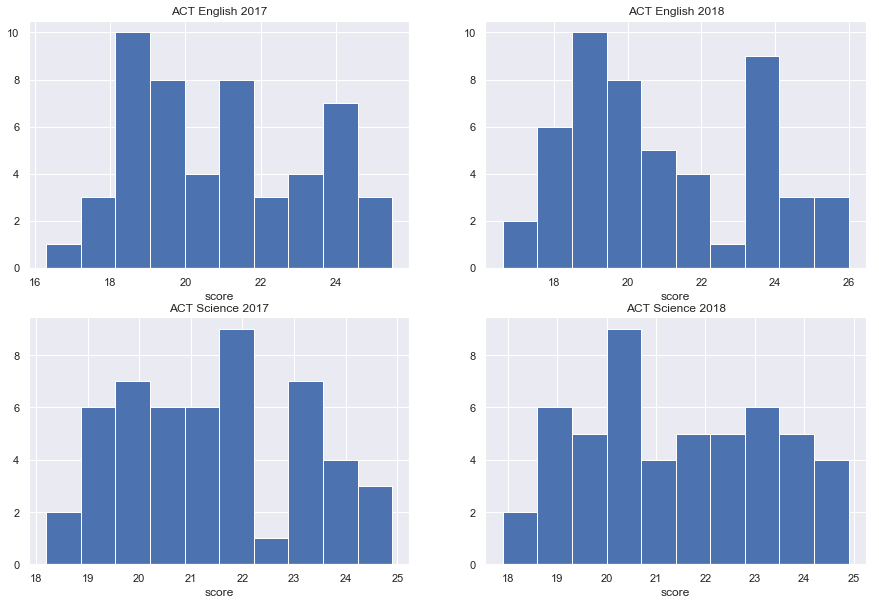

In [103]:
list_of_columns = ['act_17_english', 'act_18_english', 'act_17_science',  'act_18_science']
list_of_titles=['ACT English 2017', 'ACT English 2018', 'ACT Science 2017', 'ACT Science 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
#Histogram of ACT English and Science scores for 2017 and 2018

In [104]:
skewness(final.act_17_english, np.std(final.act_17_english)) 
#skewness for act_17_english

Right skewed
Standard deviation: 2.3304876369363363


In [105]:
skewness(final.act_18_english, np.std(final.act_18_english)) 
#skewness for act_18_english

Right skewed
Standard deviation: 2.4222536143202795


In [106]:
skewness(final.act_17_science, np.std(final.act_17_science)) 
#skewness for act_17_science

Right skewed
Standard deviation: 1.7222161451443676


In [107]:
skewness(final.act_18_science, np.std(final.act_18_science)) 
#skewness for act_18_science

Right skewed
Standard deviation: 1.8516885484833543


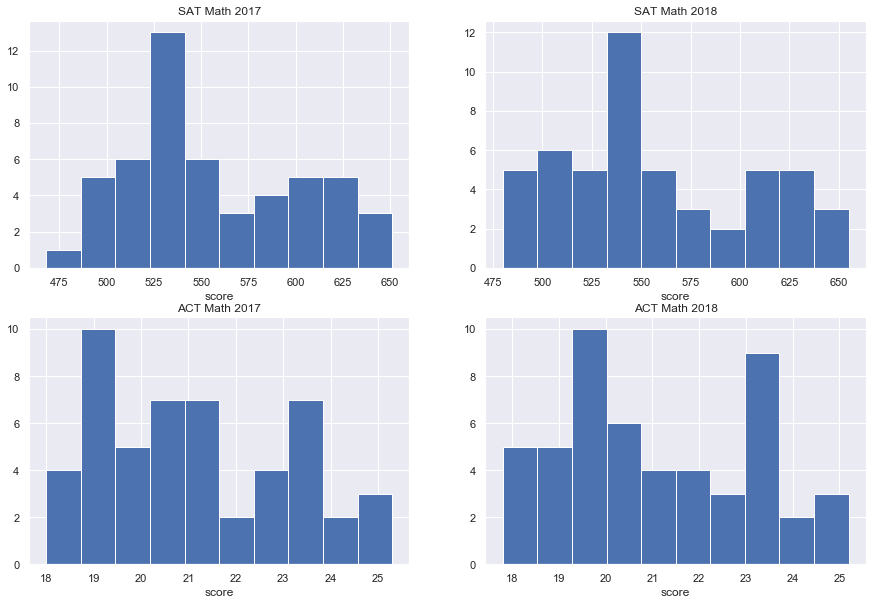

In [108]:
list_of_columns = ['sat_17_math', 'sat_18_math', 'act_17_math', 'act_18_math']
list_of_titles=['SAT Math 2017', 'SAT Math 2018', 'ACT Math 2017', 'ACT Math 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
#Histogram of SAT and ACT Math scores for 2017 and 2018

In [109]:
skewness(final.sat_17_math, np.std(final.sat_17_math)) 
#skewness for sat_17_math

Right skewed
Standard deviation: 46.65713364485503


In [110]:
skewness(final.sat_18_math, np.std(final.sat_18_math)) 
#skewness for sat_18_math

Right skewed
Standard deviation: 48.40589946919447


In [111]:
skewness(final.act_17_math, np.std(final.act_17_math)) 
#skewness for act_17_math

Right skewed
Standard deviation: 1.9624620273436781


In [112]:
skewness(final.act_18_math, np.std(final.act_18_math)) 
#skewness for act_18_math

Right skewed
Standard deviation: 2.015707255555717


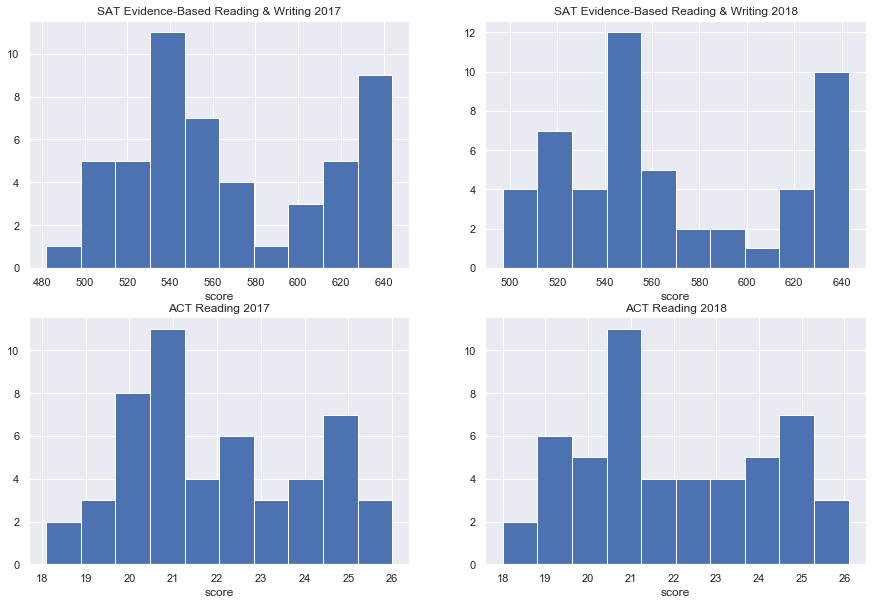

In [113]:
list_of_columns = ['sat_17_erw', 'sat_18_erw', 'act_17_reading', 'act_18_reading']
list_of_titles=['SAT Evidence-Based Reading & Writing 2017', 'SAT Evidence-Based Reading & Writing 2018', 'ACT Reading 2017', 'ACT Reading 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
#Histogram of SAT Evidence-Based Reading & Writing scores and ACT Reading scores for 2017 and 2018

### sat_17_erw Distribution is bimodal with two peaks

In [114]:
skewness(final.sat_17_erw, np.std(final.sat_17_erw)) 
#skewness for sat_17_erw

Right skewed
Standard deviation: 45.21697020437866


### sat_18_erw Distribution is bimodal with two peaks

In [115]:
skewness(final.sat_18_erw, np.std(final.sat_18_erw)) 
#skewness for sat_18_erw

Right skewed
Standard deviation: 44.87118561762388


In [116]:
skewness(final.act_17_reading, np.std(final.act_17_reading)) 
#skewness for act_17_reading

Right skewed
Standard deviation: 2.0469029314842646


In [117]:
skewness(final.act_18_reading, np.std(final.act_18_reading)) 
#skewness for act_18_reading

Right skewed
Standard deviation: 2.145891884510421


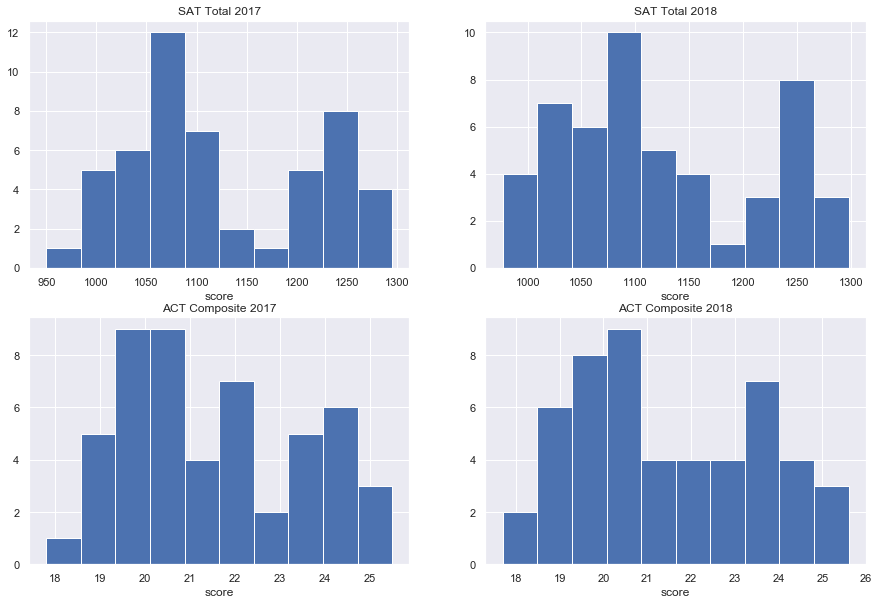

In [118]:
list_of_columns = ['sat_17_total', 'sat_18_total', 'act_17_composite', 'act_18_composite']
list_of_titles=['SAT Total 2017', 'SAT Total 2018', 'ACT Composite 2017', 'ACT Composite 2018']
list_of_xlabels=['score', 'score', 'score', 'score']
list_of_ylabels=['', '', '', ''] 
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)
# Histogram showing SAT total scores and ACT composite scores for 2017 and 2018

### sat_17_total Distribution is bimodal with two peaks

In [119]:
skewness(final.sat_17_total, np.std(final.sat_17_total)) 
#skewness for sat_17_total

Right skewed
Standard deviation: 91.58351056778743


### sat_18_total Distribution is bimodal with two peaks

In [120]:
skewness(final.sat_18_total, np.std(final.sat_18_total)) 
#skewness for sat_18_total

Right skewed
Standard deviation: 92.94224786343668


In [121]:
skewness(final.act_17_composite, np.std(final.act_17_composite)) 
#skewness for act_17_composite

Right skewed
Standard deviation: 2.000786081581989


In [122]:
skewness(final.act_18_composite, np.std(final.act_18_composite)) 
#skewness for act_18_composite

Right skewed
Standard deviation: 2.0855261815801147


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

No, not in this case. SAT and ACT data are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

From the data we have gathered above, Math (right-skewed), Reading (right-skewed), and Participation Rates (left-skewed) do not share a normal distribution. This may result in unreliable results/large room for errors when proceeding to use the data for hypothesis testing. In addition, values obtained by the specific column(s) may not represent each and every input in the column as larger skewness makes it difficult to generalise results.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

There are varying population of students in different states, this means that the mean and median will likely be skewed since every state holds the same weight in our data. To add, binomal distributions often translate to having two groups within the distribution (as seen in ACT Participation Rates). This suggest that conducting statistical inferences may not be ideal with our current data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

Yes. Math scores may be compared to determine which paper did students score better in, when scores are expressed as a percentage. However, there are limitations as students taking SAT only have two papers to clear while students taking ACT will have to take on four papers. This suggests that the comparison between SAT and ACT are not equal.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [123]:
# Hypothesis testing may not be necessary if dataset is not normally distributed

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

The following three states:

- Colorado
- Illinois
- Wyoming

have interesting trends in their SAT and/or ACT participation rates. Colorado and Illinois both share a similar trend where their ACT participation rate for 2017 sharply declines in year 2018 and the opposite is true for SAT participation rate, with more than 50% change in participation rates for both ACT and SAT for year 2017 and 2018. Wyoming has kept a consistent record with no change in participation rate over the two years. 

After some research, we can understand the change as both Colorado and Illinois has chosen to adopt SAT to act as both a college-entrance exam and a new exam for 10th-graders. The transition from students taking ACT to SAT is likely to have contributed to the participation rate change within our data frame.

Sources: 'https://www.cde.state.co.us/assessment/coloradosat', 'https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/', https://www.testive.com/illinois/, 'https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html', 'https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html'

In the state of Wyoming, ACT remains as the required examination for students. Hence, this explains why Wyoming has 100% participation rate for ACT and 3% for SAT.

Source: 'https://www.testive.com/state-sat-act/'

Research has shown that interesting trends are usually followed by a reasoning. To add to our findings, our scatter plot shows the inverse relationship between SAT and ACT participation which suggests that states will pick either one as the state required examination for their students.


Text(0, 0.5, 'ACT')

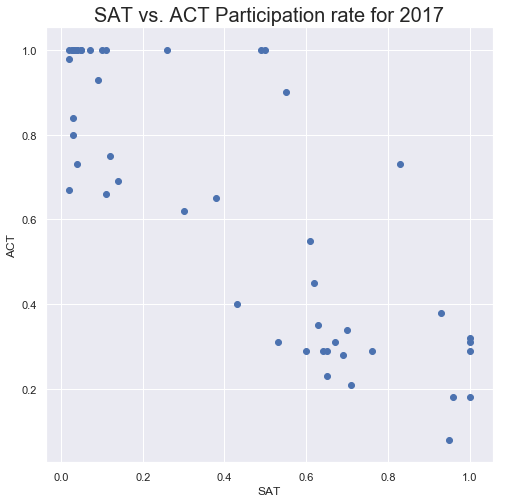

In [124]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_17_participation, final.act_17_participation)
ax.set_title('SAT vs. ACT Participation rate for 2017', fontsize=20)
ax.set_xlabel('SAT')
ax.set_ylabel('ACT')
#scatterplot for 'SAT versus ACT Participation rate for 2017'

Text(0, 0.5, 'ACT')

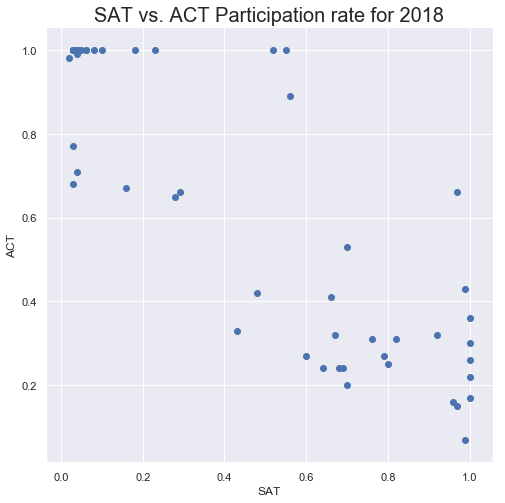

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(final.sat_18_participation, final.act_18_participation)
ax.set_title('SAT vs. ACT Participation rate for 2018', fontsize=20)
ax.set_xlabel('SAT')
ax.set_ylabel('ACT')

#scatterplot for 'SAT versus ACT Participation rate for 2018'

In [126]:
final.iloc[5,]
#Display participation rates and other variables of Colorado

state                       Colorado
act_17_participation               1
act_17_english                  20.1
act_17_math                     20.3
act_17_reading                  21.2
act_17_science                  20.9
act_17_composite                20.8
sat_17_participation            0.11
sat_17_erw                       606
sat_17_math                      595
sat_17_total                    1201
act_18_participation             0.3
act_18_english                  23.9
act_18_math                     23.2
act_18_reading                  24.4
act_18_science                  23.5
act_18_composite                23.9
sat_18_participation               1
sat_18_erw                       519
sat_18_math                      506
sat_18_total                    1025
sat_participation_change       -0.89
act_participation_change         0.7
Name: 5, dtype: object

In [127]:
final.iloc[13,]
#Display participation rates and other variables of Illinois

state                       Illinois
act_17_participation            0.93
act_17_english                    21
act_17_math                     21.2
act_17_reading                  21.6
act_17_science                  21.3
act_17_composite                21.4
sat_17_participation            0.09
sat_17_erw                       559
sat_17_math                      556
sat_17_total                    1115
act_18_participation            0.43
act_18_english                  24.1
act_18_math                     23.4
act_18_reading                  24.2
act_18_science                  23.4
act_18_composite                23.9
sat_18_participation            0.99
sat_18_erw                       513
sat_18_math                      506
sat_18_total                    1019
sat_participation_change        -0.9
act_participation_change         0.5
Name: 13, dtype: object

In [128]:
final.iloc[50,] 
#Display participation rates and other variables of Wyoming

state                       Wyoming
act_17_participation              1
act_17_english                 19.4
act_17_math                    19.8
act_17_reading                 20.8
act_17_science                 20.6
act_17_composite               20.2
sat_17_participation           0.03
sat_17_erw                      626
sat_17_math                     604
sat_17_total                   1230
act_18_participation              1
act_18_english                   19
act_18_math                    19.7
act_18_reading                 20.6
act_18_science                 20.3
act_18_composite                 20
sat_18_participation           0.03
sat_18_erw                      633
sat_18_math                     625
sat_18_total                   1258
sat_participation_change          0
act_participation_change          0
Name: 50, dtype: object

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Takeaways
- Different states in America have different test requirements for their students (not standardised).
  - ACT and SAT participation rate share an inverse relationship. 
  - Consistent from what we found in 'Outside Research'. Recent news seem to suggest certain states are recognising SAT more so than ACT and have implemented a change in state requirement for juniors. 
  - Bimodal distribution in the histograms. As bimodal distribution often suggest that there are 2 groups, we can think of the distribution as:
    - states that require SAT
    - states that require ACT
- States have to consider a smooth transition from one test requirement to another.
   - Among concerns of inconsistent scoring, states such as Colorado and Illinois have since used SAT as their main requirement for juniors. 
   - The transition was abrupt, occuring in the mid of the school term. This means that transitioned students may not have enough time to adequately prepare themselves for the SAT and have resulted in poorer grades. 
   - The scatterplot between Participation vs Total/Composite Scores show that the higher the participation rate, the poorer the score (inverse relationship). 
   - This suggests that the former argument holds certain truth but it also means that states that did not make any transition tend to fare better in test.
- Other factors may be affecting certain states who have consistently poor participation rates.
   - In our data, they were many states that had consistent participation rates as well. Some of these states however face consistently poor participation rates as well. 
   - This is similar to the 'Estimates Limits of Data' where reasons may not be found within our data. States with much less population may seem to 'contribute' much less to the national average. 
   - This can also lead to other factors such as poor learning environment or lack of schools which might possibly lead to students not being able to prepare themselves for the test. 



### Recommendation

###### Alabama 
|Participation|Percentage|
|---|---|
|act_17_participation|0.08 (8%)|
|act_18_participation|0.07 (7%)|      
|sat_17_participation|0.02 (2%)| 
|sat_18_participation|0.02 (2%)|

States that show changes within SAT or ACT participation rates may be due to points 1 and 2 in Key Takeways. As such we focus on Alabama, the state with the lowest ACT/SAT participation rates in the USA. 

Background on Alabama's educational attainment: https://cber.cba.ua.edu/rbriefs/ab2003Q2_education.pdf

Although education/educational attainment has improved over the years, it is vital for the newer generation to understand the importance of education in the long run. I will recommend the College Board to take on a more holistic approach towards education for states like Alabama and alike; to get current students (graduating seniors) to understand how pursuing education may help them progress farther as compared to being in the working class. 